In [5]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.datasets import load_breast_cancer

In [6]:
# Q. 3.3

In [7]:
X, Y = make_circles(1500)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=250, random_state=1)

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=250, random_state=1)

In [10]:
Y_train = np_utils.to_categorical(Y_train, 2)
Y_test = np_utils.to_categorical(Y_test, 2)

In [13]:
# Refactor code
def train_neural_network(n_epochs, batch, X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(100, input_shape=(2,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
    
    model.fit(X_train, Y_train, batch_size=batch, epochs=n_epochs, verbose=0)
    
    loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)
    
    X = X_train
    Y = Y_train
    Y = np.argmax(Y_train, axis=1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.scatter(X[np.where(Y==0)[0], 0], X[np.where(Y==0)[0], 1], label='0')
    plt.scatter(X[np.where(Y==1)[0], 0], X[np.where(Y==1)[0], 1], label='1')
    
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.legend()
    plt.show()
    
    return loss_and_metrics[1]

8/8 - 0s - loss: 0.5039 - accuracy: 0.9240 - 107ms/epoch - 13ms/step
1250/1250 [==============================] - 1s 755us/step


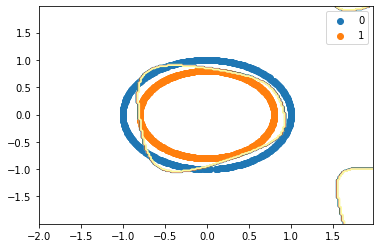

In [15]:
# Neural Network on Circles Dataset
# epochs = 10000, batch size = 32, hidden layer size = 100
res = train_neural_network(10000, 32, X_train, X_test, Y_train, Y_test)